In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pickle
import joblib

In [2]:
df= pd.read_csv('vgsales.csv')

print(df.head)

<bound method NDFrame.head of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales

In [3]:
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [4]:
df.dropna(inplace=True)

df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [5]:
sales_data = df[['Global_Sales', 'NA_Sales']]

In [6]:
def categorize_continent(row):
    if row['NA_Sales'] > 0:
        return 'North America'
    elif row['EU_Sales'] > 0:
        return 'Europe'
    elif row['JP_Sales'] > 0:
        return 'Japan'
    else:
        return 'Other'

df['Continent'] = df.apply(categorize_continent, axis=1)

In [7]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().reset_index()

In [8]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

In [9]:
genre_sales_sorted = genre_sales.sort_values(by='Global_Sales', ascending=False)

In [10]:
publisher_sales_sorted = publisher_sales.sort_values(by='Global_Sales', ascending=False)

In [11]:
top_n_publishers = 15 #This number can be changed to get different results in the chart

In [12]:
top_n_genres = 15 #This number can be changed to get different results in the chart

In [13]:
continent_sales = df.groupby(['Publisher', 'Continent'])['Global_Sales'].sum().reset_index()

In [14]:
largest_publishers_by_continent = continent_sales.groupby('Continent').apply(lambda x: x['Publisher'][x['Global_Sales'].idxmax()]).reset_index()

Text(0.5, 1.0, 'Top 15 Publishers by Global Sales')

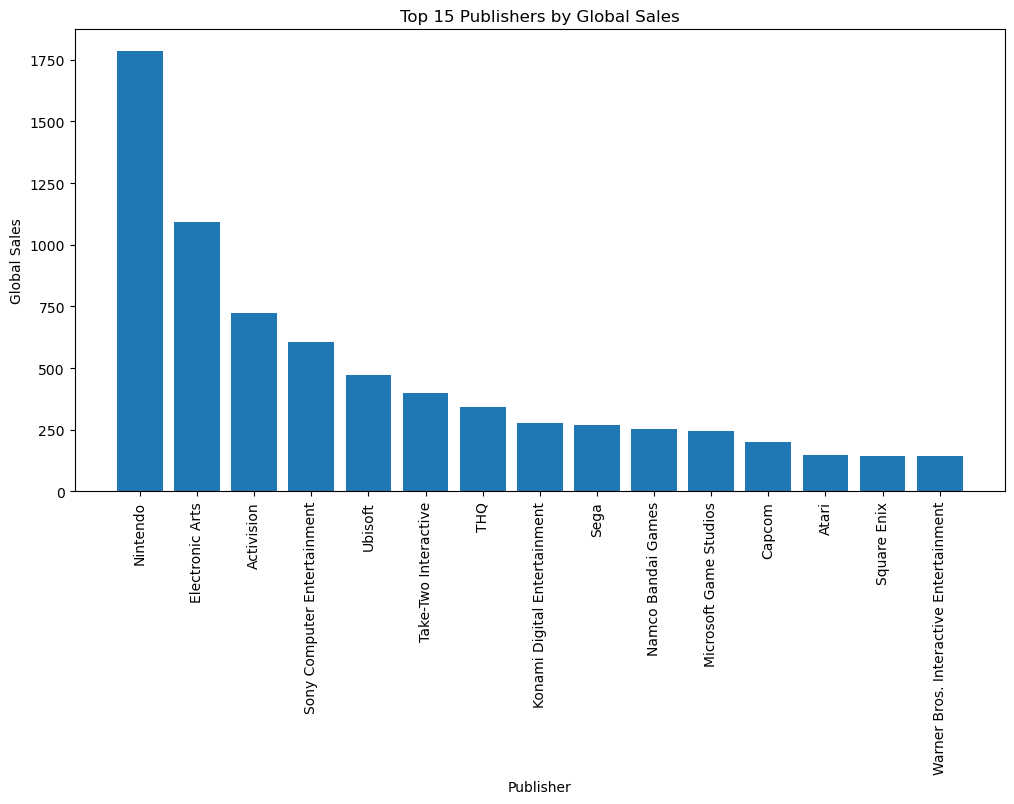

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(publisher_sales_sorted['Publisher'][:top_n_publishers], publisher_sales_sorted['Global_Sales'][:top_n_publishers])
plt.xticks(rotation=90)
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.title('Top {} Publishers by Global Sales'.format(top_n_publishers))

In [16]:
plt.savefig('top_publishers_global_sales.png')
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Top 15 Genres by Global Sales')

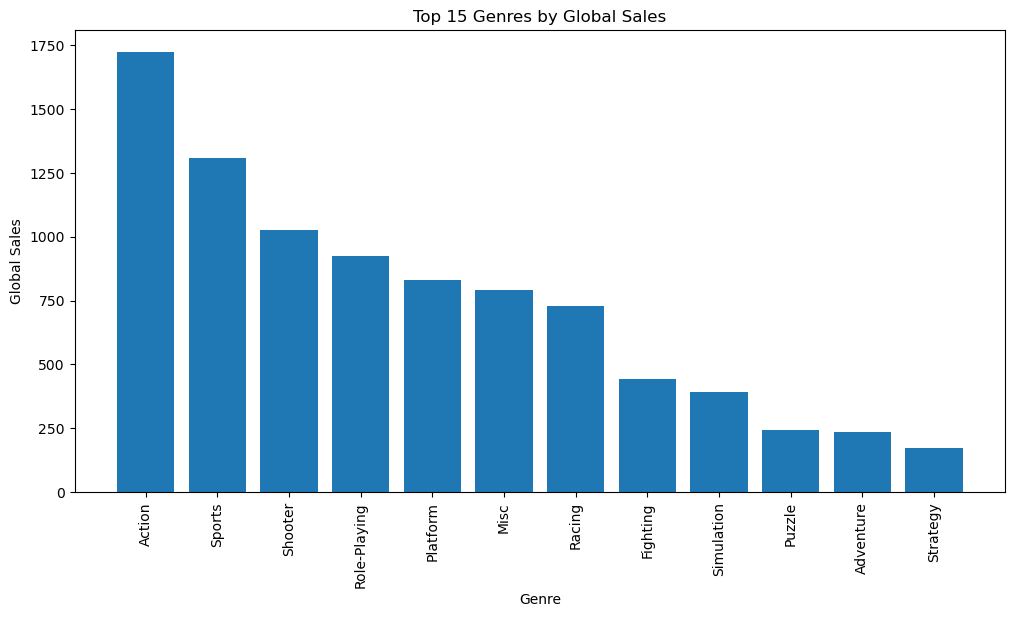

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(genre_sales_sorted['Genre'][:top_n_genres], genre_sales_sorted['Global_Sales'][:top_n_genres])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Top {} Genres by Global Sales'.format(top_n_genres))

In [18]:
plt.savefig('top_genres_global_sales.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
print("Largest Overall Publisher:")
print(largest_publisher)

Largest Overall Publisher:


NameError: name 'largest_publisher' is not defined

In [ ]:
print("Largest Publishers by Continent:")
print(largest_publishers_by_continent)

In [20]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
df['Cluster'] = kmeans.fit_predict(sales_data)

Text(0.5, 1.0, 'Clustering of Games by Sales')

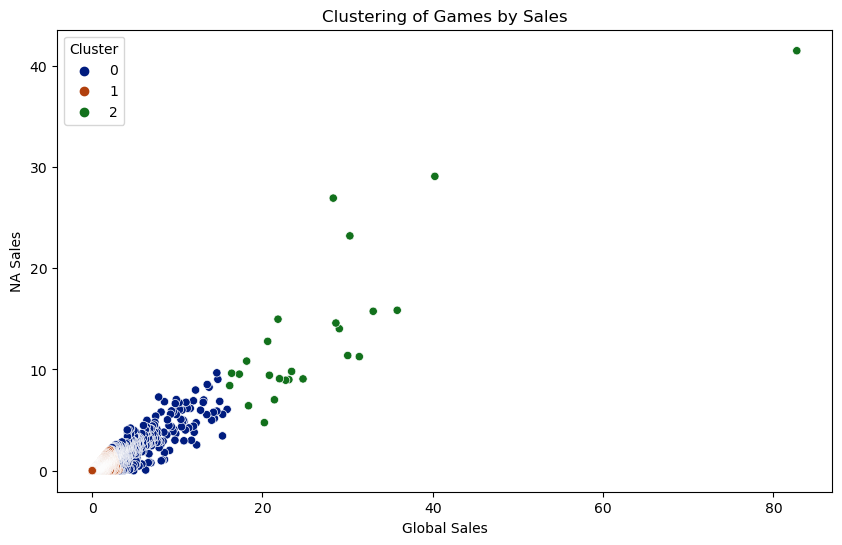

In [21]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Global_Sales', y='NA_Sales', hue='Cluster', palette='dark', legend='full')
plt.xlabel('Global Sales')
plt.ylabel('NA Sales')
plt.title('Clustering of Games by Sales')

In [22]:
#DL

In [23]:
df = pd.read_csv('vgsales.csv')

In [24]:
df.dropna(inplace=True)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [25]:
df['Year'] = df['Year'].dt.year

In [26]:
X = df[['Year', 'Genre', 'Platform']]
y = df['Global_Sales']

In [27]:
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[['Genre', 'Platform']])

In [28]:
encoded_feature_names = encoder.get_feature_names_out(['Genre', 'Platform'])

In [29]:
X_encoded = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X = pd.concat([X[['Year']], X_encoded], axis=1)

In [30]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (16589, 42)
Shape of y: (16291,)


In [31]:
min_samples = min(X.shape[0], y.shape[0])
X = X.iloc[:min_samples]
y = y.iloc[:min_samples]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1) 
])

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/50
408/408 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/50
408/408 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/50
408/408 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 8/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/50
408/408 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/50
408/408 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/50
408/408 [==============================] - 0s 1

Epoch 1/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 3/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 4/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 5/50
408/408 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/50
408/408 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 8/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/50
408/408 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/50
408/408 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/50
408/408 [==============================] - 0s 1

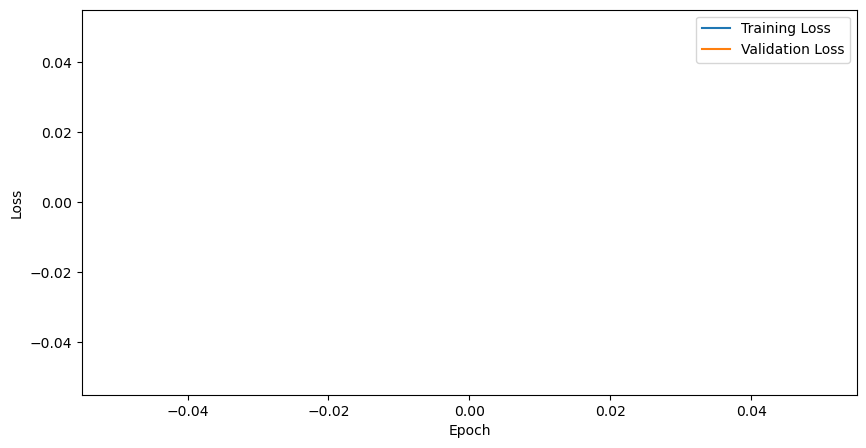

In [69]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
model.save('my_model.keras')

In [40]:
with open('encoder.pkl', 'wb') as encoder_file:
    joblib.dump(encoder, encoder_file)
    
print("Encoder saved to 'encoder.pkl'")

Encoder saved to 'encoder.pkl'
